In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

Let $(X,Y)$ be a pair of real random variables such that $X$ is uniformly distributed on $[0,1]$ and $Y = f_*(X)+\sigma \varepsilon$, where $f_*(x) = \sin(6x)$, $\sigma = 0.5$, and $\varepsilon$ is a standard Gaussian random variable, independent from $X$. 

**Q1.** Generate $n = 40$ realizations $(x_i, y_i), i = 1, \dots n$ of $(X,Y)$.

In [ ]:
n = 40  # Nombre de réalisations
Xs=torch.rand(size=(n,1)) #on a généré 40 réalisations
sigma = 0.5  # Écart-type du bruit

'''# Étape 1 : Générer n réalisations de X (uniformément distribué sur [0, 1])
x = np.random.uniform(0, 1, n)

# Étape 2 : Générer n réalisations de Y (basé sur le modèle donné)
epsilon = np.random.randn(n)  # Bruit gaussien
y = np.sin(6 * x) + sigma * epsilon



# Afficher les premières réalisations comme exemple
for i in range(min(n, 10)):  # Afficher les 10 premières réalisations
    print(f"x_{i+1} = {x[i]:.4f}, y_{i+1} = {y[i]:.4f}")'''
    

'# Étape 1 : Générer n réalisations de X (uniformément distribué sur [0, 1])\nx = np.random.uniform(0, 1, n)\n\n# Étape 2 : Générer n réalisations de Y (basé sur le modèle donné)\nepsilon = np.random.randn(n)  # Bruit gaussien\ny = np.sin(6 * x) + sigma * epsilon\n\n\n\n# Afficher les premières réalisations comme exemple\nfor i in range(min(n, 10)):  # Afficher les 10 premières réalisations\n    print(f"x_{i+1} = {x[i]:.4f}, y_{i+1} = {y[i]:.4f}")'

In [ ]:
def fstar(x):
    return torch.sin(6*x)

epsilon = torch.randn(size=(n,1))
Ys = fstar(Xs)+sigma*epsilon

**Q2.** Plot the realizations of $(X,Y)$ along with the curve $y = f_*(x)$.

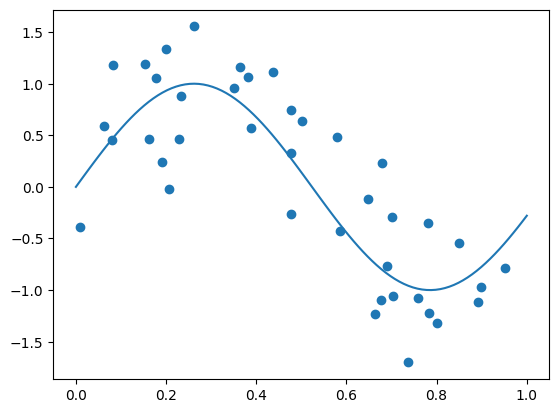

In [ ]:
'''plt.scatter(x, y, color='b', label='(x_i, y_i)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Réalisations générées de (X, Y)')
plt.grid(True)
plt.show()'''

plt.scatter(Xs,Ys)
xs = torch.linspace(0,1,100)
plt.plot(xs, fstar(xs))

plt.show()

#on aurait pu faire plt.plot(Xs,Ys), mais ça aurait mis des traits entre.

The goal of this exercise is to learn the function $f_*$ from the $n$ observations. To this end, we use linear regression. 

**Q3.** Here, what are the input space $\mathcal{X}$ and output space $\mathcal{Y}$? What optimization problem to solve in order to find $f_*$? Give the formulas for each answer. (No code)

X app $\mathcal{X}$ = [0,1], Y app $\mathcal{Y}$ = R (réel).

Minimiser le risque empirique par w

Reg lin : fw(x) = w x ^Rn(w) avec w réel, x dans [0,1] et ^Rn(w) = 1/n somme de i=1 à n de (yi-wxi)^2

(Input space X : [0,1]. Output space Y : [-2,2]
argmin(Rn) avec Rn l'espérance de (^f(X)-X)**2  --> risque empirique)

We will perform linear regression by implementing a neural network with one linear layer and one neuron, whose parameters are optimized with gradient descent.

For the next questions, it is useful to have a look at the PyTorch documentation here: https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

**Q4.** Define this neural network with PyTorch and instantiate it.

In [ ]:
# Definition of the neural network
class LinearRegression(nn.Module): #initialiser la classe, qui aura des attributs et des méthodes
    def __init__(self):
        super(LinearRegression, self).__init__() #on va définir l'archi du NN
        self.linear = nn.Linear(1, 1) #on a 1 neurone, une entrée, une sortie (car regression et pas classification)

    def forward(self, x): #on définit une méthode : prend en entrée x et ressort ^y. On a pas eu besoin de flatten, qui permet de transformer des matrices en vecteurs (on a déjà des vecteurs)
        return self.linear(x)    

# Instantiation of the model
model = LinearRegression().to("cpu") #.to("cpu") pas utile

**Q5.** Make predictions on $(x_i), i=1,...,n$ using this instantiated model. Evaluate the empirical risk and plot the results. What do you observe?

tensor([[-0.9739],
        [-0.9186],
        [-1.0609],
        [-0.6064],
        [-0.7476],
        [-1.1091],
        [-0.5394],
        [-0.6443],
        [-0.6386],
        [-1.1391],
        [-0.8395],
        [-1.0017],
        [-1.0024],
        [-0.9830],
        [-0.5021],
        [-1.0424],
        [-0.7701],
        [-0.7750],
        [-0.7584],
        [-0.8113],
        [-0.9631],
        [-0.6845],
        [-0.6630],
        [-0.8567],
        [-0.6114],
        [-0.5546],
        [-0.9129],
        [-1.1828],
        [-0.9856],
        [-0.6229],
        [-0.8399],
        [-0.6608],
        [-1.0587],
        [-0.5523],
        [-1.0730],
        [-0.8395],
        [-1.1440],
        [-0.6336],
        [-0.9930],
        [-1.0276]], grad_fn=<AddmmBackward0>)


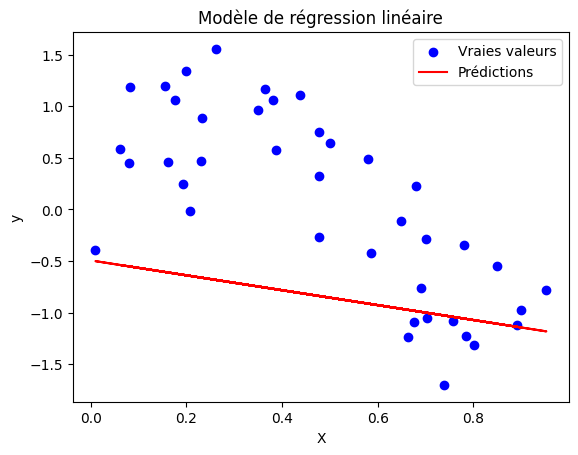

In [ ]:
# ce qu'on a fait
logits = model(Xs)
print(logits)

plt.scatter(Xs.numpy(), Ys.numpy(), label="Vraies valeurs", color='blue')
plt.plot(Xs.numpy(), logits.detach().numpy(), label="Prédictions", color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Modèle de régression linéaire")
plt.legend()
plt.show()

In [ ]:
Ypred = model(Xs)
Ypred.shape

torch.Size([40, 1])

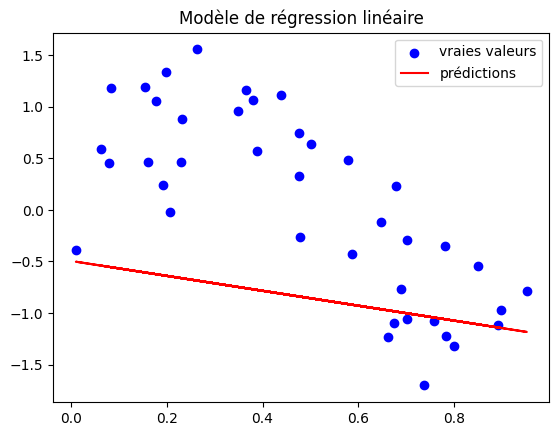

In [ ]:
plt.scatter(Xs,Ys,label="vraies valeurs", color='blue')
plt.plot(Xs, Ypred.detach(), label="prédictions", color='red')
plt.title("Modèle de régression linéaire")
plt.legend()
plt.show()

In [ ]:
criterion = nn.MSELoss() #critère d'éval sur données
loss = criterion(Ypred,Ys) #c'est le risque empirique : en moyenne, erreur de ...
loss

tensor(1.3693, grad_fn=<MseLossBackward0>)

**Q6.** Write the gradient descent procedure for this problem, with the expressions of the gradients. (No code)

In [ ]:
\theta_{t+1} = \theta_t - \epsilon \nabla g_{i_t}(\theta_t)

SyntaxError: unexpected character after line continuation character (723346151.py, line 1)

**Q7.** Implement the gradient descent with PyTorch, using the nice functionalities of PyTorch (for example, don't implement the loss function or the gradient from scratch)

Use a learning rate of 0.1 and 100 iterations.

In [ ]:
# code

**Q8.** Plot the predictions and compare them to the data. Comment.

In [ ]:
# code

**Q9:** Play with the different parameters (number of iterations, learning rate) and comment on the observed effects on the convergence and predictions.

**Q10:** Compare your results with the ones obtained with ordinary least squares estimator.

In [ ]:
# code